In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', None)
%matplotlib inline


: 

In [3]:
# set a variable to read prostate data
prostate_data = pd.read_csv("prostate_cancer_required_columns_21.csv")

In [5]:
columns_to_exclude = ["AGEP_P"]

# Get a list of columns to convert to categorical data type
columns_to_convert = [col for col in prostate_data.columns if col not in columns_to_exclude]

# Convert the selected columns to categorical data type
prostate_data[columns_to_convert] = prostate_data[columns_to_convert].astype("category")


In [6]:
prostate_data = prostate_data.astype({"AGEP_A":'int64'})

In [8]:
prostate_data.dtypes

AGEP_A             int64
BMICAT_A        category
DIBEV_A         category
SMKEV_A         category
SMKCIGST_A      category
CHLEV_A         category
ECIGEV_A        category
SMKECIGST_A     category
COPDEV_A        category
ASEV_A          category
SASPPHISP_A     category
HYPEV_A         category
CHDEV_A         category
STREV_A         category
BREASCAN_A      category
SEX_A           category
PROSTCAN_A      category
HISPALLP_A      category
HISDETP_A       category
RACEALLP_A      category
EDUCP_A         category
URBRRL          category
K6SPD_A         category
EMDWRKCAT1_A    category
FDSBALANCE_A    category
FDSLESS_A       category
FDSHUNGRY_A     category
FDSWEIGHT_A     category
HOUTENURE_A     category
POVRATTC_A      category
FDSRUNOUT_A     category
FDSLAST_A       category
HISP_A          category
dtype: object

In [24]:
# Defining features (X) and target variable (y)
columns = prostate_data.columns
feature_columns = ['AGEP_A', 'URBRRL', 'BMICAT_A', 'EDUCP_A', 'POVRATTC_A']  # feature columns
target_column = 'PROSTCAN_A'  #  target column name
X = prostate_data[feature_columns]
y = prostate_data[target_column]


In [33]:
target_mapping = {1: 'Positive', 2: 'Negative', 9: 'Not sure', 7: 'Refused'}
prostate_data['PROSTCAN_A'] = prostate_data['PROSTCAN_A'].replace(target_mapping)

In [34]:
prostate_data['PROSTCAN_A'].value_counts()/len(prostate_data)

Negative    0.705692
Positive    0.287840
Not sure    0.005175
Refused     0.001294
Name: PROSTCAN_A, dtype: float64

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

In [27]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [37]:


# Assuming you have X_train, y_train from the previous code

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Evaluate the model using classification report
target_names = ['Negative', 'Positive', 'Not sure', 'Refused']
print(classification_report(y_train, y_train_pred, target_names=target_names))


              precision    recall  f1-score   support

    Negative       1.00      0.99      0.99       345
    Positive       1.00      1.00      1.00       884
    Not sure       1.00      1.00      1.00         2
     Refused       1.00      1.00      1.00         5

    accuracy                           1.00      1236
   macro avg       1.00      1.00      1.00      1236
weighted avg       1.00      1.00      1.00      1236



In [44]:


# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.63
Confusion Matrix:
[[ 18  82   0]
 [ 29 178   0]
 [  0   3   0]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.38      0.18      0.24       100
         2.0       0.68      0.86      0.76       207
         9.0       0.00      0.00      0.00         3

    accuracy                           0.63       310
   macro avg       0.35      0.35      0.33       310
weighted avg       0.58      0.63      0.58       310



C:\Users\HP 10th Gen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP 10th Gen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


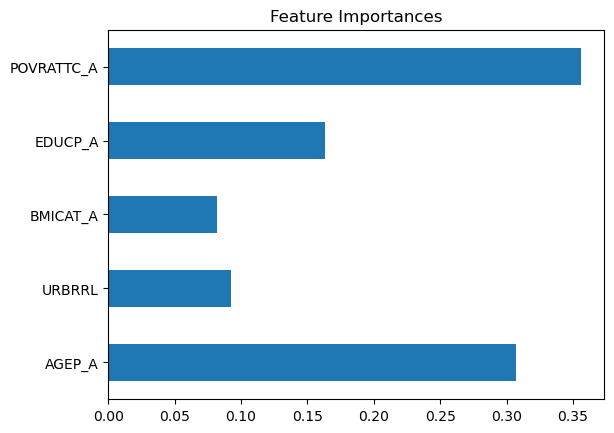

In [30]:
# If you want to see feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=feature_columns)
feature_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()